In [1]:
from scipy.stats import zscore

from phd_journal.roma.plotting import *
from phd_journal.roma.combat_variations import *
from phd_journal.roma.read import *

#### I/O

In [2]:
datasets_paths = {
    "Newcastle": "/Volumes/MMIS-Saraiv/Datasets/Newcastle/EC/features_source_ind-bands",
    "Izmir": "/Volumes/MMIS-Saraiv/Datasets/Izmir/EC/features_source_ind-bands",
    "Sapienza": "/Volumes/MMIS-Saraiv/Datasets/Sapienza/features_source_ind-bands",
}

In [3]:
datasets_metadata_paths = {
    "Izmir": "/Volumes/MMIS-Saraiv/Datasets/Izmir/metadata.csv",
    "Sapienza": "/Volumes/MMIS-Saraiv/Datasets/Sapienza/metadata.csv",
    "Newcastle": "/Volumes/MMIS-Saraiv/Datasets/Newcastle/metadata.csv",
}

#### Read

In [4]:
# Read datasets
datasets = {}
for dataset_name, path in datasets_paths.items():
    dataset = read_dataset(path, label=dataset_name)
    datasets[dataset_name] = dataset

In [5]:
# Read metadata
datasets_metadata = {}
for dataset_name, path in datasets_metadata_paths.items():
    dataset = read_metadata(path, label=dataset_name)
    dataset['SITE'] = [s.split('-')[0] for s in dataset.index]
    datasets_metadata[dataset_name] = dataset

#### Before log transformation

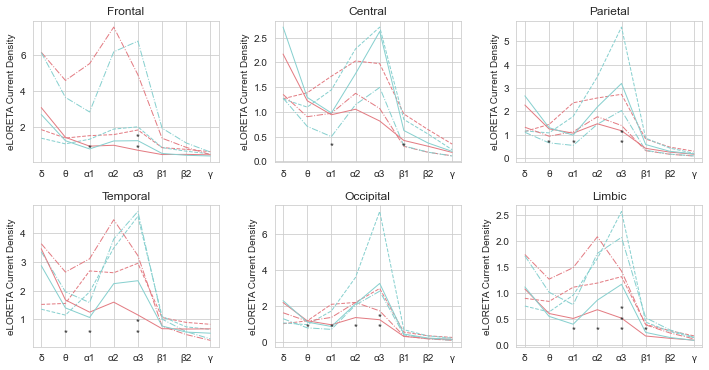

In [6]:
plot_mean_std_indep(datasets, datasets_metadata, log_scale=False)

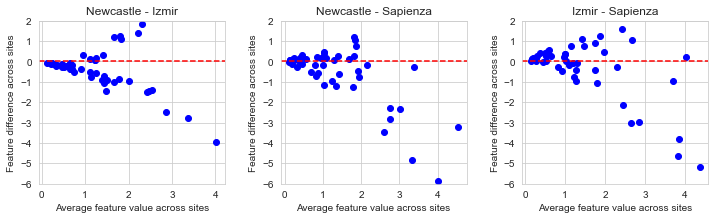

In [7]:
plot_mean_diffs(datasets)

In [8]:
# Check normality before
check_normality(datasets, datasets_metadata)
#create_qq_plots(datasets)

Checking normality for dataset: Newcastle
Number of normally distributed features: 8 out of 48
Checking normality for dataset: Izmir
Number of normally distributed features: 0 out of 48
Checking normality for dataset: Sapienza
Number of normally distributed features: 13 out of 48


#### Log transformation

In [9]:
# Approximate normality by log transformation
datasets = {dataset_name: intra_dataset_norm(dataset, method='log') for dataset_name, dataset in datasets.items()}

Checking normality for dataset: Newcastle
Number of normally distributed features: 42 out of 48
Checking normality for dataset: Izmir
Number of normally distributed features: 40 out of 48
Checking normality for dataset: Sapienza
Number of normally distributed features: 44 out of 48
Creating Q-Q plots for dataset: Newcastle


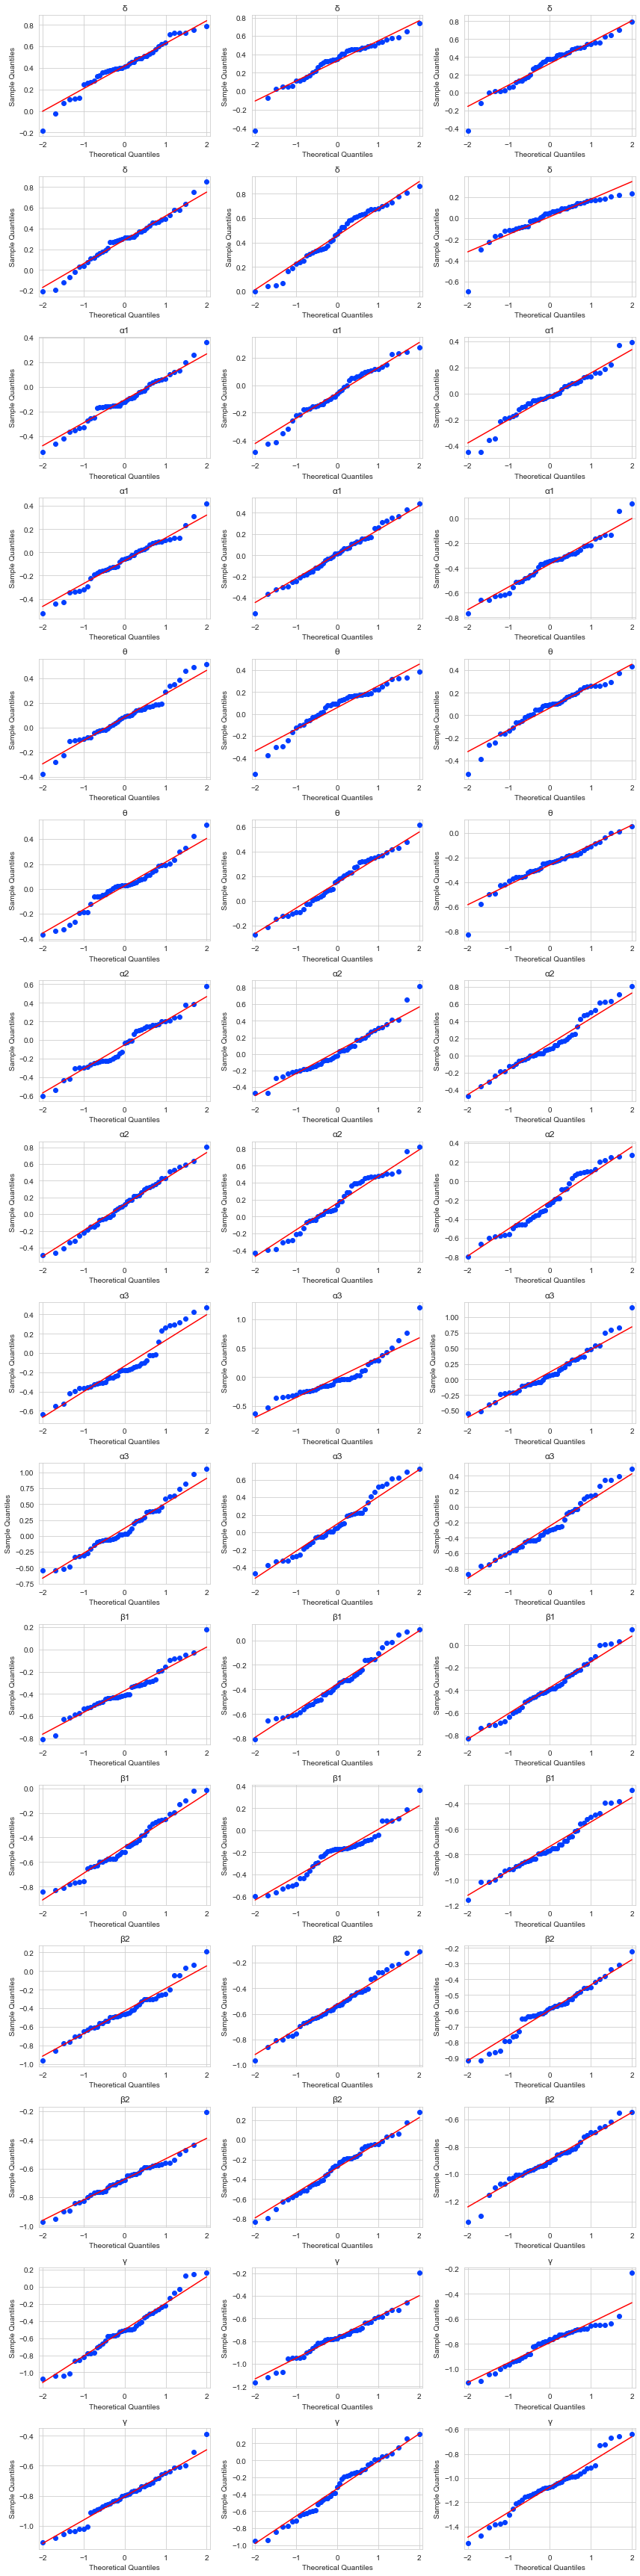

Creating Q-Q plots for dataset: Izmir


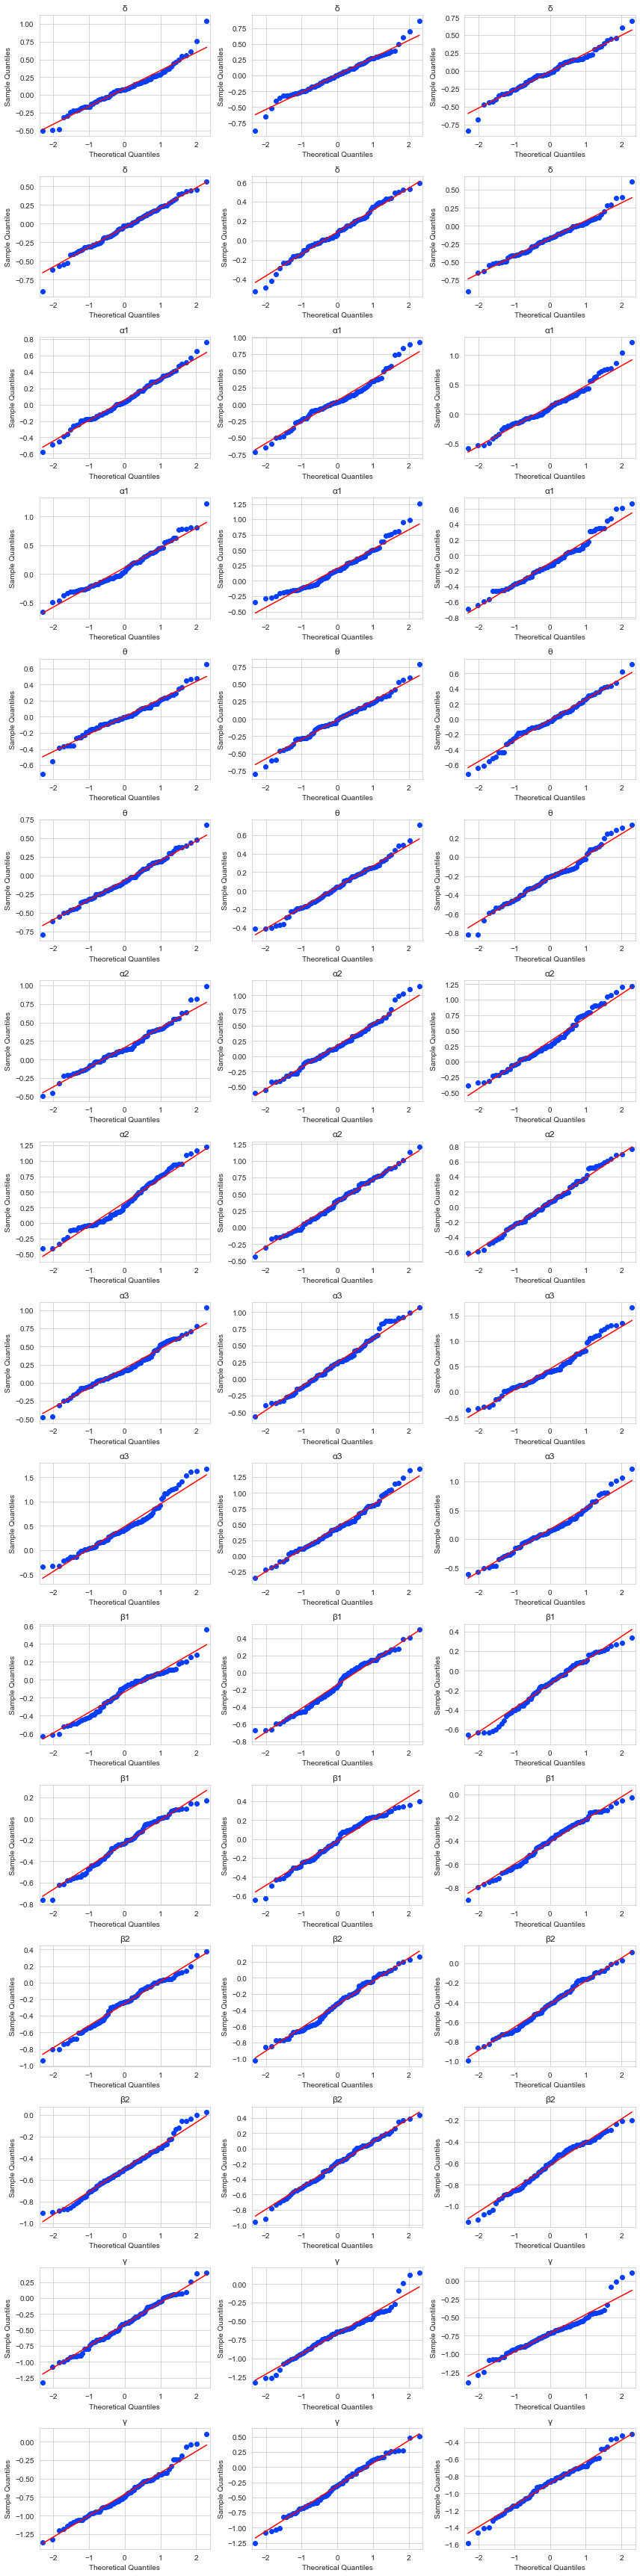

Creating Q-Q plots for dataset: Sapienza


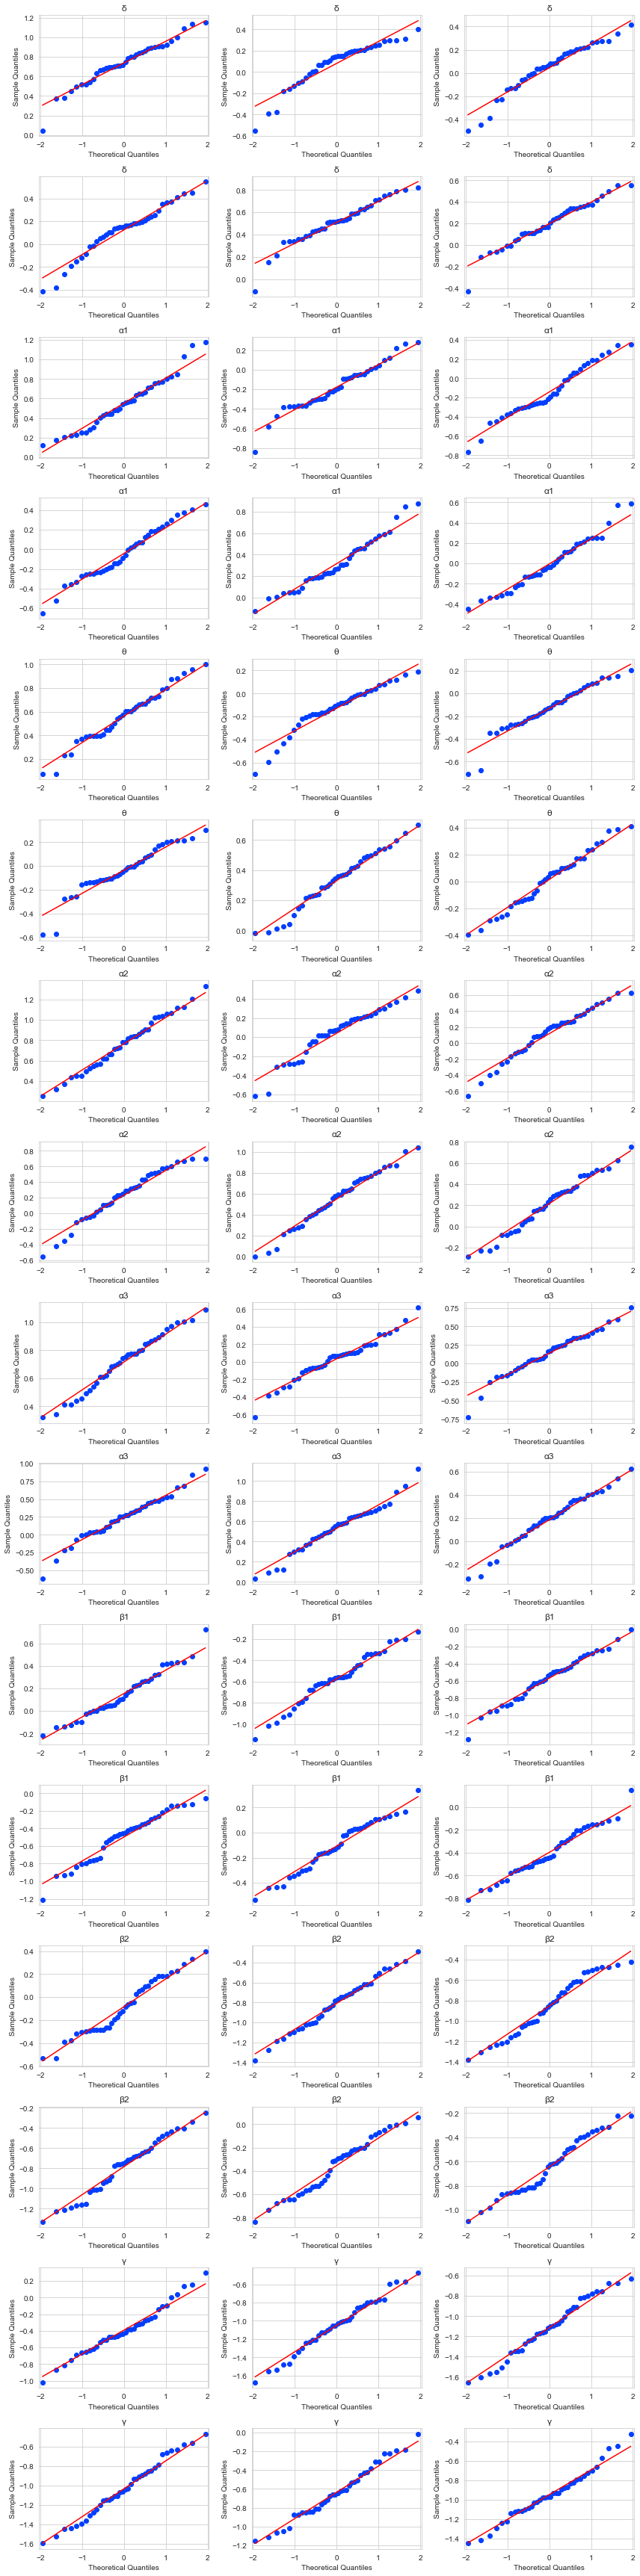

In [10]:
# Check normality after log
check_normality(datasets, datasets_metadata)
create_qq_plots(datasets)

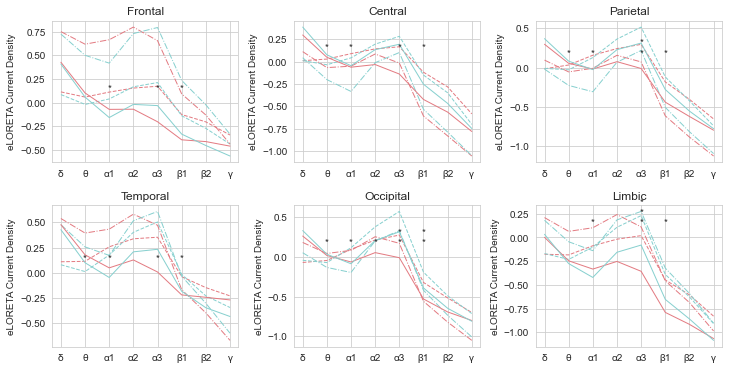

In [11]:
plot_mean_std_indep(datasets, datasets_metadata, log_scale=False)

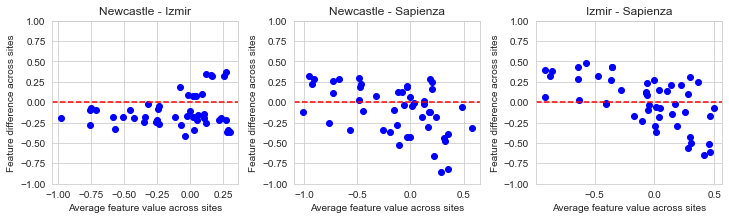

In [12]:
plot_mean_diffs(datasets, log=True)

#### Harmonisation

Covariates: Index(['AGE', 'GENDER', 'EDUCATION YEARS', 'SITE', 'DIAGNOSIS'], dtype='object')


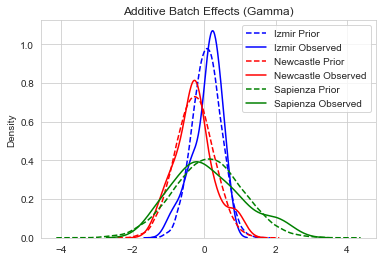

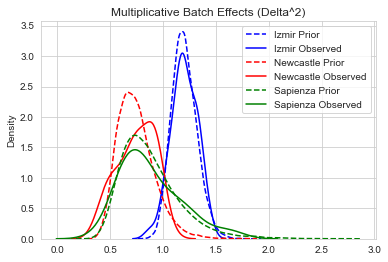

In [13]:
# Join all datasets and metadata
X = pd.concat(datasets.values())
all_metadata = pd.concat(datasets_metadata.values())
all_metadata = all_metadata.loc[X.index]  # keep only the metadata of the subjects in X
assert X.shape[0] == all_metadata.shape[0]
# NeuroHarmonize
X = neuro_harmonize(X, all_metadata, cov_age=True, cov_gender=True, cov_education=True)
datasets_after = {dataset_name: X.loc[datasets[dataset_name].index] for dataset_name in datasets.keys()}

In [14]:
X = intra_dataset_norm(X, method='z-score')
# Put back as it was
datasets_after_zscore = {dataset_name: X.loc[datasets[dataset_name].index] for dataset_name in datasets.keys()}

In [15]:
# Undo log transformation
datasets_after_nolog = {dataset_name: np.power(10, dataset) for dataset_name, dataset in datasets_after.items()}

#### After harmonisation

In [16]:
# Check normality after COMBAT
check_normality(datasets_after, datasets_metadata)
#create_qq_plots(datasets)

Checking normality for dataset: Newcastle
Number of normally distributed features: 42 out of 48
Checking normality for dataset: Izmir
Number of normally distributed features: 40 out of 48
Checking normality for dataset: Sapienza
Number of normally distributed features: 44 out of 48


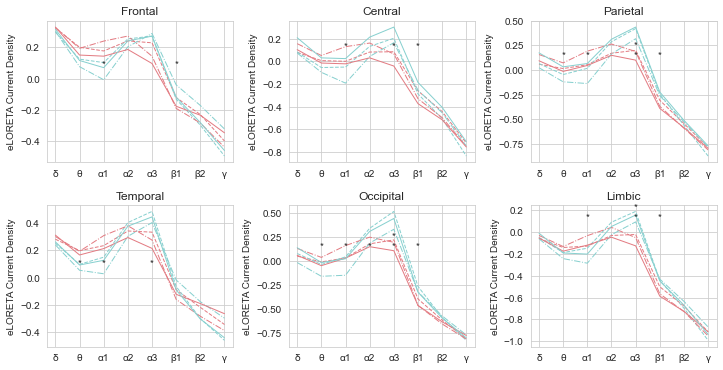

In [17]:
# Plot all regions
plot_mean_std_indep(datasets_after, datasets_metadata)

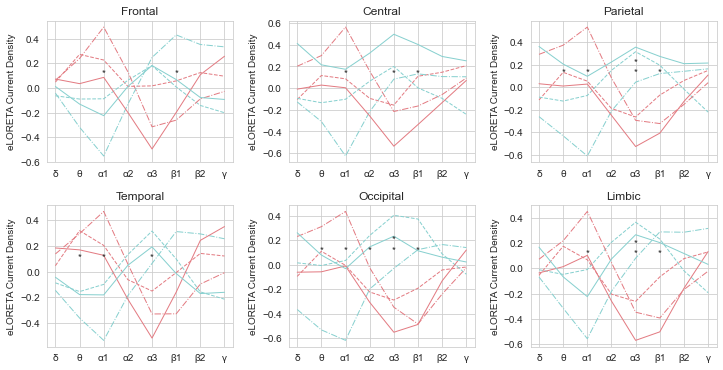

In [18]:
# Plot all regions (Z-score)
plot_mean_std_indep(datasets_after_zscore, datasets_metadata)

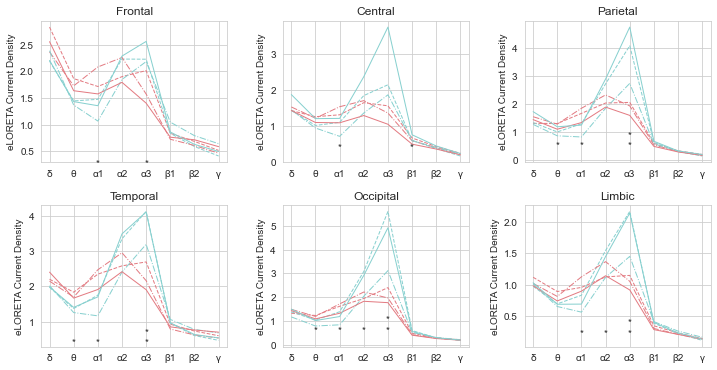

In [19]:
# Plot all regions (no log)
plot_mean_std_indep(datasets_after_nolog, datasets_metadata)

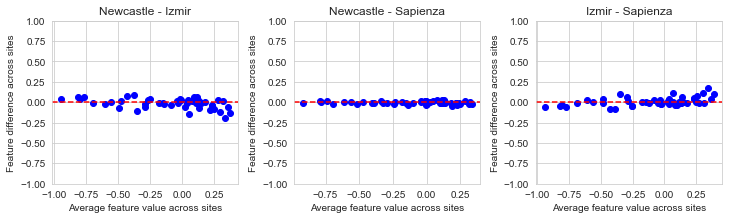

In [20]:
plot_mean_diffs(datasets_after, log=True)

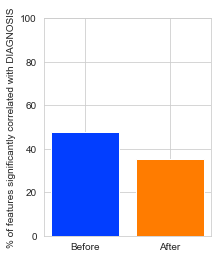

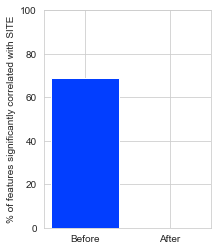

['Theta_Temporal',
 'Delta_Temporal',
 'Theta_Frontal',
 'Theta_Temporal',
 'Alpha1_Frontal',
 'Alpha1_Temporal',
 'Delta_Frontal',
 'Alpha1_Frontal',
 'Alpha1_Central',
 'Alpha1_Limbic',
 'Alpha1_Temporal',
 'Alpha1_Parietal',
 'Theta_Frontal',
 'Theta_Limbic',
 'Alpha2_Limbic',
 'Beta2_Limbic',
 'Alpha2_Occipital',
 'Beta2_Parietal',
 'Alpha2_Parietal',
 'Beta1_Temporal',
 'Alpha2_Occipital',
 'Beta1_Central',
 'Beta2_Occipital',
 'Alpha3_Frontal',
 'Beta1_Parietal',
 'Alpha3_Central',
 'Beta1_Limbic',
 'Alpha3_Temporal',
 'Alpha3_Temporal',
 'Beta1_Parietal',
 'Beta1_Limbic',
 'Alpha3_Parietal',
 'Alpha3_Central',
 'Beta1_Occipital',
 'Alpha3_Limbic',
 'Alpha3_Occipital',
 'Alpha3_Limbic',
 'Alpha3_Parietal',
 'Beta1_Occipital',
 'Alpha3_Occipital']

In [21]:
correlation_with_var(datasets, datasets_after, datasets_metadata, ("DIAGNOSIS", "SITE"))

Relevant features by RFE:
Index(['Alpha1_Occipital', 'Alpha1_Temporal', 'Theta_Temporal', 'Theta_Limbic',
       'Alpha2_Occipital', 'Alpha3_Parietal', 'Alpha3_Occipital',
       'Alpha3_Limbic', 'Beta1_Parietal', 'Beta1_Occipital'],
      dtype='object')
Before
{'0': {'precision': 0.7428571428571429, 'recall': 0.7959183673469388, 'f1-score': 0.768472906403941, 'support': 98}, '1': {'precision': 0.7014925373134329, 'recall': 0.6351351351351351, 'f1-score': 0.6666666666666666, 'support': 74}, 'accuracy': 0.7267441860465116, 'macro avg': {'precision': 0.7221748400852879, 'recall': 0.7155267512410369, 'f1-score': 0.7175697865353038, 'support': 172}, 'weighted avg': {'precision': 0.7250607427976398, 'recall': 0.7267441860465116, 'f1-score': 0.7246725474472065, 'support': 172}}
Relevant features by RFE:
Index(['Delta_Frontal', 'Alpha1_Frontal', 'Alpha1_Occipital',
       'Alpha1_Temporal', 'Alpha3_Central', 'Alpha3_Occipital',
       'Alpha3_Temporal', 'Alpha3_Limbic', 'Beta1_Parietal',
   

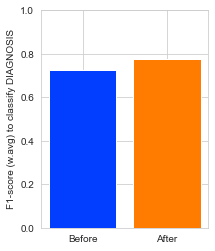

Relevant features by RFE:
Index(['Delta_Frontal', 'Delta_Central', 'Delta_Temporal', 'Delta_Limbic',
       'Alpha1_Frontal', 'Theta_Frontal', 'Alpha2_Frontal', 'Alpha3_Frontal',
       'Beta1_Frontal', 'Beta1_Limbic'],
      dtype='object')
Before
{'0': {'precision': 0.8604651162790697, 'recall': 0.8604651162790697, 'f1-score': 0.8604651162790697, 'support': 43}, '1': {'precision': 0.9111111111111111, 'recall': 0.9010989010989011, 'f1-score': 0.9060773480662984, 'support': 91}, '2': {'precision': 0.8717948717948718, 'recall': 0.8947368421052632, 'f1-score': 0.8831168831168831, 'support': 38}, 'accuracy': 0.8895348837209303, 'macro avg': {'precision': 0.8811236997283509, 'recall': 0.8854336198277447, 'f1-score': 0.8832197824874171, 'support': 172}, 'weighted avg': {'precision': 0.8897634665076525, 'recall': 0.8895348837209303, 'f1-score': 0.8896016292585738, 'support': 172}}
Relevant features by RFE:
Index(['Theta_Frontal', 'Alpha3_Frontal', 'Alpha3_Central', 'Alpha3_Limbic',
       'B

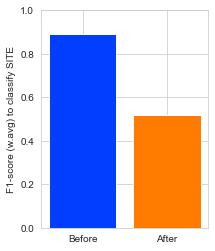

In [22]:
classification_with_var(datasets, datasets_after, datasets_metadata, ("DIAGNOSIS", "SITE"), relevant_features=None)

In [23]:
datasets_metadata['Izmir']

,DIAGNOSIS,AGE,GENDER,EDUCATION YEARS,MMSE,MMSEc,SITE
Izmir-12,AD,74,M,11,18.0,16.0,Izmir
Izmir-13,AD,77,M,11,20.0,19.0,Izmir
Izmir-14,AD,81,F,11,25.0,24.0,Izmir
Izmir-15,AD,72,F,5,24.0,23.0,Izmir
Izmir-16,AD,66,F,5,20.0,18.0,Izmir
...,...,...,...,...,...,...,...
Izmir-154,HC,58,F,15,30.0,30.0,Izmir
Izmir-155,HC,68,F,7,27.0,25.0,Izmir
Izmir-156,HC,70,M,20,29.0,26.0,Izmir
Izmir-157,HC,69,F,17,30.0,27.0,Izmir


Relevant features by RFE:
Index(['Alpha1_Parietal', 'Alpha1_Temporal', 'Theta_Frontal', 'Theta_Temporal',
       'Theta_Limbic', 'Alpha2_Occipital', 'Alpha3_Occipital', 'Alpha3_Limbic',
       'Beta1_Parietal', 'Beta1_Occipital'],
      dtype='object')
Before
RMSE: 4.38
R2: 0.2513121002931368
Relevant features by RFE:
Index(['Alpha1_Parietal', 'Alpha1_Temporal', 'Theta_Parietal',
       'Theta_Temporal', 'Theta_Limbic', 'Alpha3_Frontal', 'Alpha3_Occipital',
       'Beta1_Parietal', 'Beta1_Occipital', 'Beta2_Occipital'],
      dtype='object')
After
RMSE: 4.39
R2: 0.24825744395953053


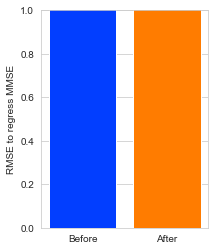

Relevant features by RFE:
Index(['Delta_Frontal', 'Delta_Limbic', 'Theta_Temporal', 'Alpha2_Central',
       'Alpha3_Frontal', 'Alpha3_Parietal', 'Alpha3_Occipital',
       'Beta1_Occipital', 'Beta2_Parietal', 'Gamma_Central'],
      dtype='object')
Before
RMSE: 7.74
R2: 0.19225471793341897
Relevant features by RFE:
Index(['Alpha1_Parietal', 'Alpha1_Temporal', 'Theta_Limbic', 'Alpha3_Frontal',
       'Alpha3_Occipital', 'Alpha3_Temporal', 'Beta1_Central',
       'Beta1_Occipital', 'Beta2_Frontal', 'Gamma_Parietal'],
      dtype='object')
After
RMSE: 7.58
R2: 0.22362029602242461


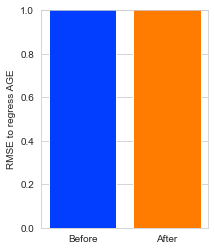

In [24]:
regression_with_var(datasets, datasets_after, datasets_metadata, ("MMSE", "AGE"), relevant_features=None)

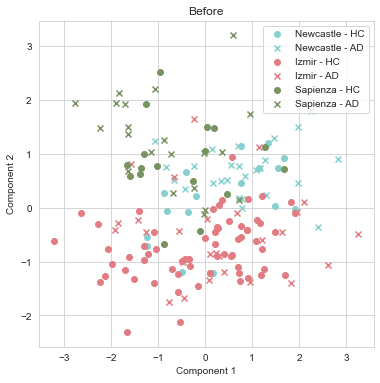

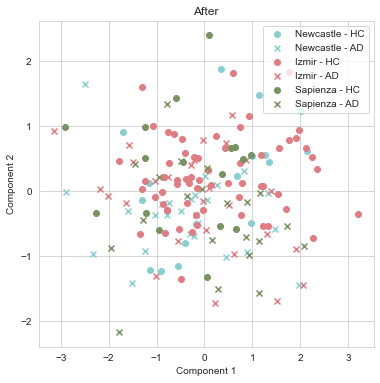

In [25]:
plot_2components(datasets, datasets_after, datasets_metadata, method='pca')

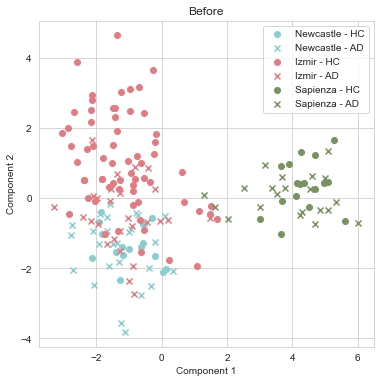

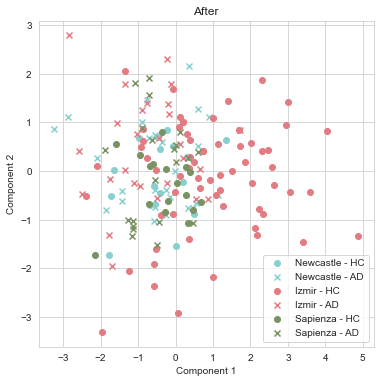

In [26]:
plot_2components(datasets, datasets_after, datasets_metadata, method='lda')

/Users/saraiva/PycharmProjects/IT-LongTermBiosignals/venv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/saraiva/PycharmProjects/IT-LongTermBiosignals/venv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/saraiva/PycharmProjects/IT-LongTermBiosignals/venv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/saraiva/PycharmProjects/IT-LongTermBiosignals/venv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


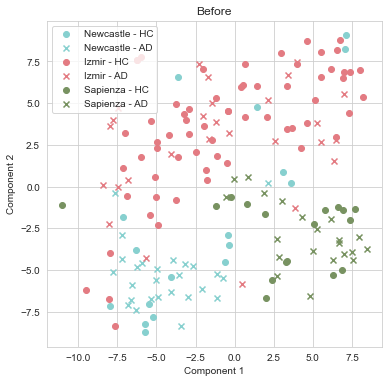

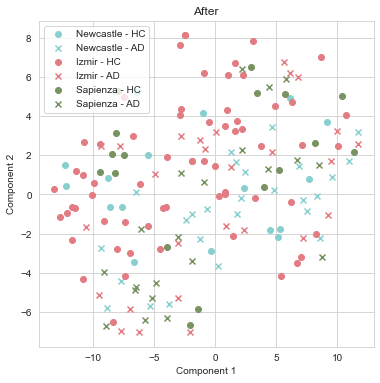

In [27]:
plot_2components(datasets, datasets_after, datasets_metadata, method='tsne')

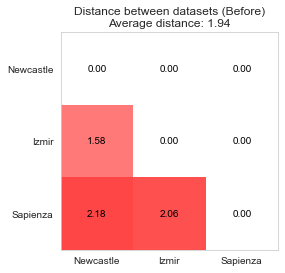

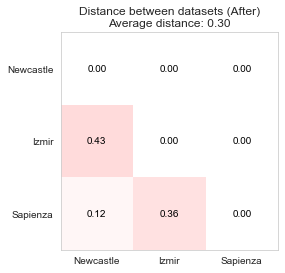

In [28]:
plot_distance_matrix(datasets, datasets_after, datasets_metadata)